In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import json
def plot_db(path, experiment3, offset):
    with open(path+experiment3+'/4.json') as json_file:
        data = json.load(json_file)
    plt.plot(np.array(data['train_loss_history'][offset:])*-1)
    plt.plot(np.array(data['valid_loss_history'][offset:])*-1)
    plt.axvline(x=data['best_epoch']-offset+1,color='r')
    plt.grid(True)
    plt.xlabel('epochs')
    plt.ylabel('Min(SNR-SDSDR)')
    plt.xlim(offset)
    plt.title(experiment3)
    plt.legend(['train', 'val', 'best epoch'])
    plt.savefig(path+experiment3+'/tcurve.pdf')

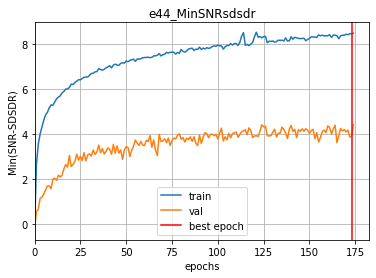

In [11]:
plot_db('/home/enricguso/PycharmProjects/temp_experiments/', 'e44_MinSNRsdsdr', 0)